In [2]:
'''
This notebook reproduces the CZ gate in Fig 3 from Reference [5]
'''

'\nThis notebook reproduces the CZ gate in Fig 3 from Reference [5]\n'

In [3]:
import math
import perceval as pcvl
import perceval.components.unitary_components as comp
from perceval.components import BS, PERM

In [4]:
# Gates
Z = pcvl.PS(math.pi)
THETA_1 = (math.pi*54.74)/90
THETA_2 = (math.pi*17.63)/90

# Simulation config
logical_qubits = 2
source = pcvl.Source() # emission_probability=0.40, multiphoton_component=0.01
QPU = pcvl.Processor("SLOS", logical_qubits*2, source)

![as width=50%](img/CZ.jpg)

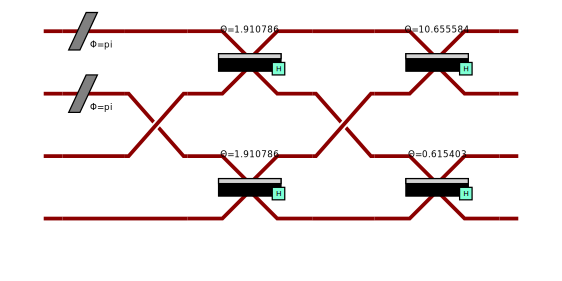

In [5]:
QPU.add(0, Z)
QPU.add(1, Z)

QPU.add(1, PERM([1, 0]))

QPU.add(0, BS.H(theta=THETA_1))
QPU.add(2, BS.H(theta=THETA_1))

QPU.add(1, PERM([1, 0]))

QPU.add(0, BS.H(theta=-1*THETA_1))
QPU.add(2, BS.H(theta=THETA_2))

pcvl.pdisplay(QPU, recursive=False)

In [6]:
QPU.with_input(pcvl.BasicState([0, 1, 0, 1]))

# |11> -> -|11>

pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

In [7]:
states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"00": "00", "01": "01", "10": "10", "11": "11"})
pcvl.pdisplay(ca)
print(f"performance = {pcvl.simple_float(ca.performance)[1]}, fidelity = {ca.fidelity*100}%")


performance = 1, fidelity = (15.165239125249174+0j)%
